# My teammate contribution - John mahith pagi

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

In [ ]:
df = pd.read_csv(r'/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [ ]:
df.columns


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
unique_value_columns = [col for col in df.columns if df[col].nunique() == 1]
unique_value_columns

['EmployeeCount', 'Over18', 'StandardHours']

In [ ]:
df = df.drop(columns=unique_value_columns, axis=1)
df = df.drop(columns=["EmployeeNumber"], axis=1)
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [ ]:
# define array for numeric and categorical vars

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

numeric_columns, categorical_columns

(Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
        'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
        'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
        'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
        'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
        'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
        'YearsSinceLastPromotion', 'YearsWithCurrManager'],
       dtype='object'),
 Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
        'JobRole', 'MaritalStatus', 'OverTime'],
       dtype='object'))

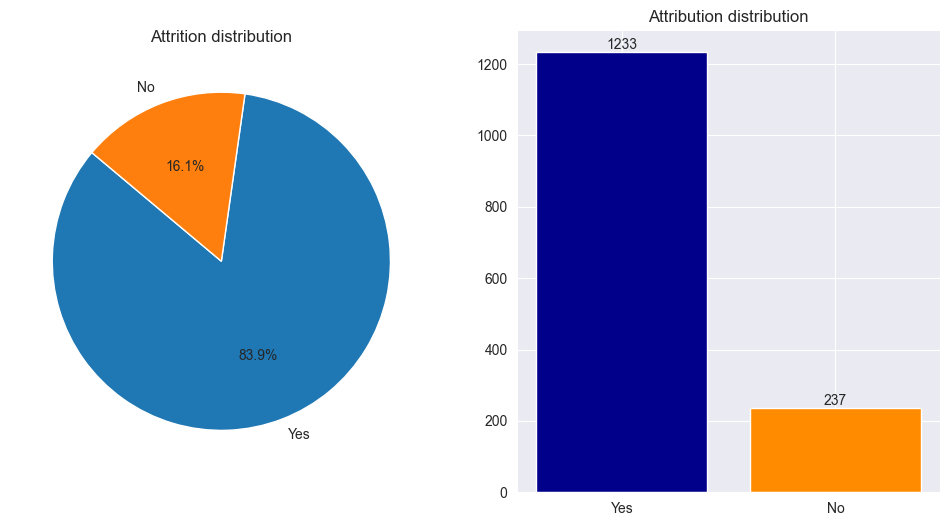

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,6))

ax[0].pie(df.Attrition.value_counts(), labels=df.Attrition.unique(), autopct='%1.1f%%', startangle=140)
ax[0].set_title("Attrition distribution")

ax[1].bar(df.Attrition.unique(), df.Attrition.value_counts(), color=["darkblue", "darkorange"])
for bars in ax[1].containers:
    ax[1].bar_label(bars)

plt.title("Attribution distribution")
plt.show()

As shown on the chart above, we see this is an imbalanced class problem. Indeed, the percentage of Current Employees in our dataset is 83.9% and the percentage of Ex-employees is: 16.1%

Machine learning algorithms typically work best when the number of instances of each classes are roughly equal. We will have to address this target feature imbalance prior to implementing our Machine Learning algorithms.

Text(0.5, 1.0, 'Age Distribution in Percent by Attrition Status')

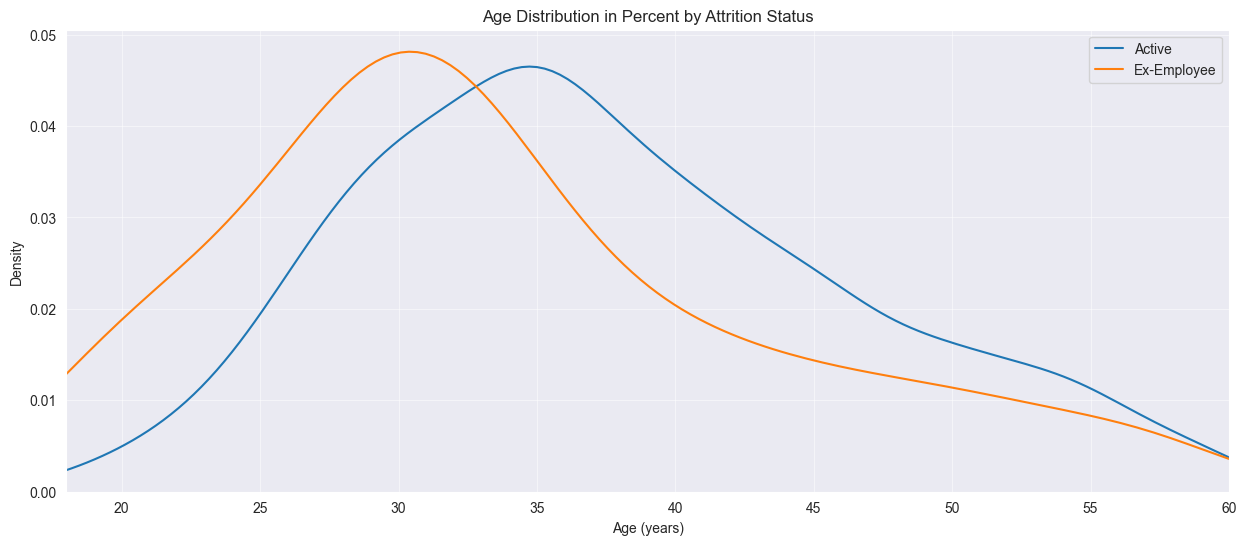

In [ ]:
plt.figure(figsize=(15,6))
plt.grid(True, alpha=0.5)
sns.kdeplot(df.loc[df['Attrition'] == 'No', 'Age'], label = 'Active')
sns.kdeplot(df.loc[df['Attrition'] == 'Yes', 'Age'], label = 'Ex-Employee')
plt.xlim(left=18, right=60)
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.legend()
plt.title('Age Distribution in Percent by Attrition Status')

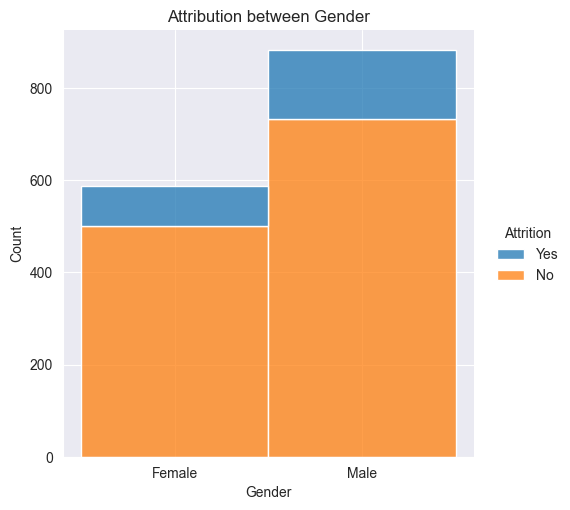

In [ ]:
sns.displot(data=df, x="Gender", hue="Attrition", multiple="stack").set(title="Attribution between Gender")

In [ ]:
value_counts_with_percentage = df[['Gender','Attrition']].groupby('Gender').value_counts().groupby(level=0).apply(lambda x: x / x.sum() * 100)
value_counts_with_percentage

Gender  Gender  Attrition
Female  Female  No           85.204082
                Yes          14.795918
Male    Male    No           82.993197
                Yes          17.006803
Name: count, dtype: float64

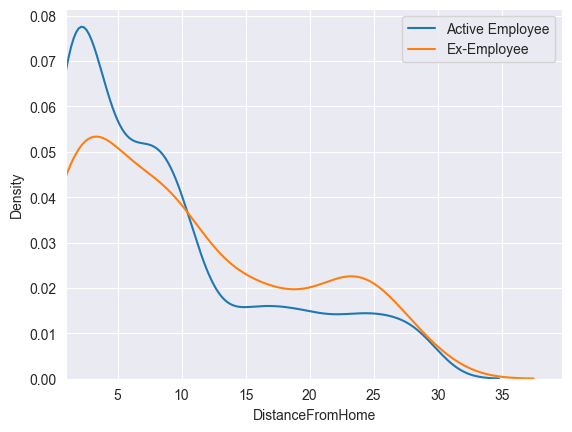

In [ ]:
fig, ax = plt.subplots()
sns.kdeplot(df.loc[df['Attrition'] == 'No', 'DistanceFromHome'], label = 'Active Employee')
sns.kdeplot(df.loc[df['Attrition'] == 'Yes', 'DistanceFromHome'], label = 'Ex-Employee')
ax.set_xlim(1)
plt.legend()
plt.show()

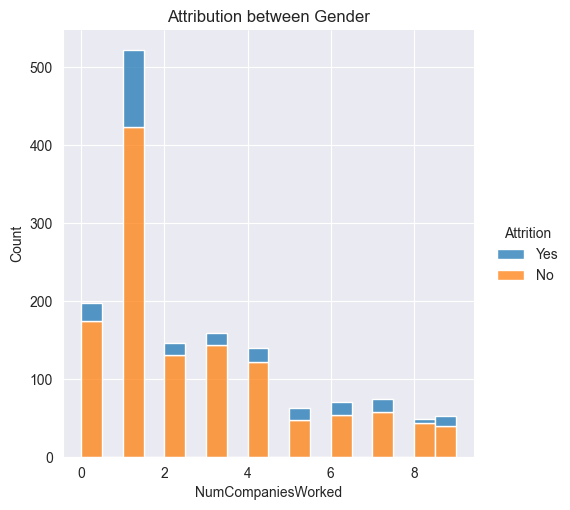

In [ ]:
sns.displot(data=df, x="NumCompaniesWorked", hue="Attrition", multiple="stack").set(title="Attribution between Gender")

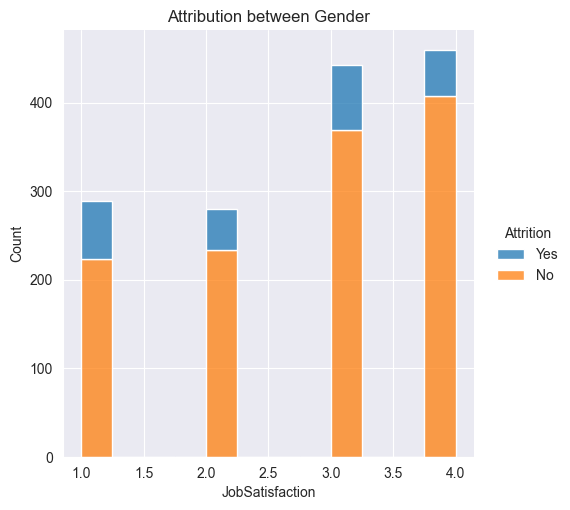

In [ ]:
sns.displot(data=df, x="JobSatisfaction", hue="Attrition", multiple="stack").set(title="Attribution between Gender")

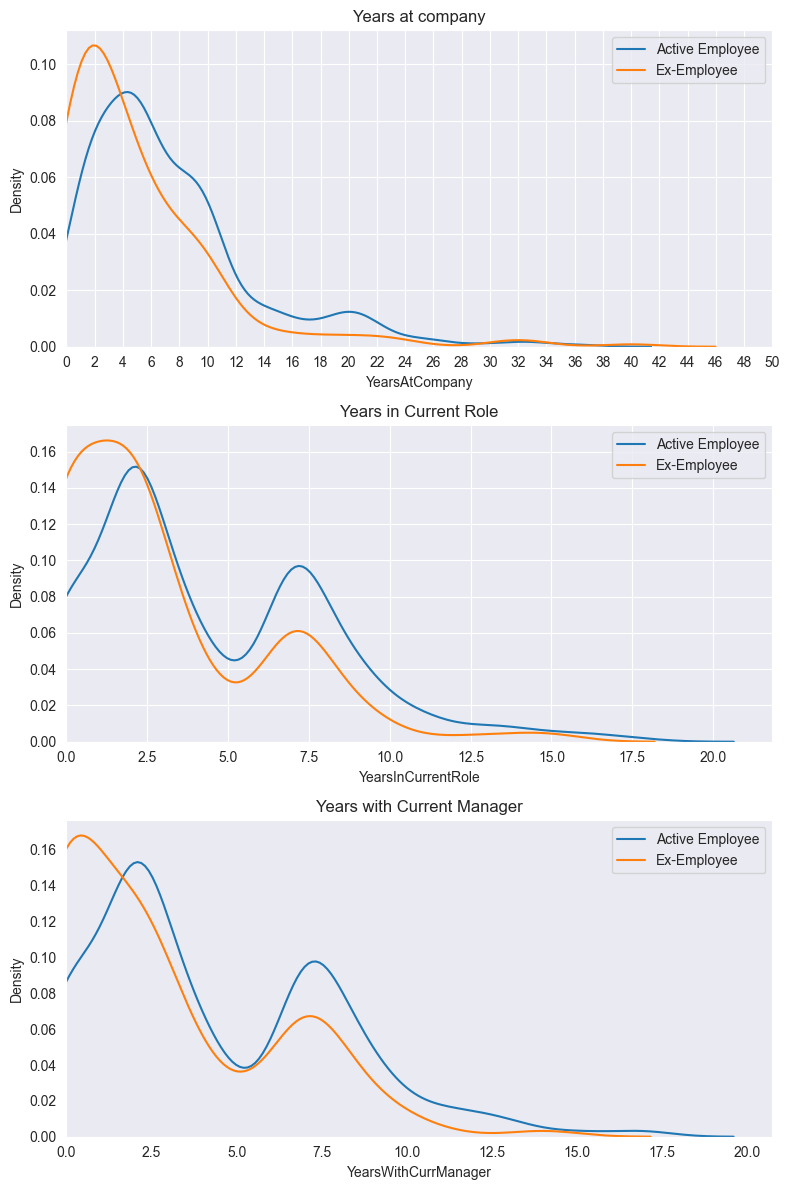

In [ ]:
# Creating a 2x1 subplot
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

sns.kdeplot(df.loc[df['Attrition'] == 'No', 'YearsAtCompany'], label = 'Active Employee', ax=axs[0])
sns.kdeplot(df.loc[df['Attrition'] == 'Yes', 'YearsAtCompany'], label = 'Ex-Employee', ax=axs[0])
axs[0].set_xlim(0)
axs[0].set_title('Years at company')
axs[0].set_xticks(range(0, 52, 2))
axs[0].legend()

# Plotting 'YearsInCurrentRole' in the first subplot
sns.kdeplot(df.loc[df['Attrition'] == 'No', 'YearsInCurrentRole'], label='Active Employee', ax=axs[1])
sns.kdeplot(df.loc[df['Attrition'] == 'Yes', 'YearsInCurrentRole'], label='Ex-Employee', ax=axs[1])
axs[1].set_xlim(0)
axs[1].set_title('Years in Current Role')
axs[1].legend()

# Plotting 'YearsWithCurrManager' in the second subplot
sns.kdeplot(df.loc[df['Attrition'] == 'No', 'YearsWithCurrManager'], label='Active Employee', ax=axs[2])
sns.kdeplot(df.loc[df['Attrition'] == 'Yes', 'YearsWithCurrManager'], label='Ex-Employee', ax=axs[2])
axs[2].set_xlim(0)
axs[2].set_title('Years with Current Manager')
axs[2].legend()

# Adjusting layout for better readability
plt.tight_layout()
plt.grid()

# Display the plot
plt.show()

After 2 year with the company attrition of employees reduces. The average for active employees is 7.4 years for active employees and the mean for ex-employees is 5.1 years at the company. After around 7.5 in the same role and with the current manager attrition increases again for employees.

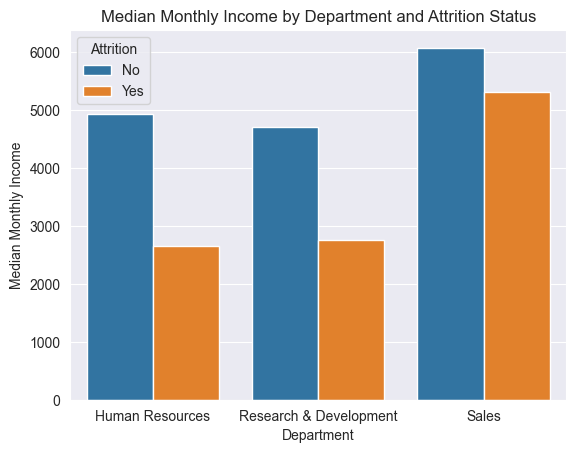

In [ ]:
plot_df = df.groupby(['Department', 'Attrition'])['MonthlyIncome'].median().reset_index()

# Creating the bar plot
sns.barplot(data=plot_df, x='Department', y='MonthlyIncome', hue='Attrition')

plt.title('Median Monthly Income by Department and Attrition Status')
plt.xlabel('Department')
plt.ylabel('Median Monthly Income')
plt.show()

In comparison to current employees, former employees had lower median salaries across all three departments. In Human Resources, women tend to have higher median salaries than men.

In [ ]:
df_trans = df.copy()
df_trans['Attrition'] = df_trans['Attrition'].apply(
    lambda x: 0 if x == 'No' else 1)

In [ ]:
corr_matrix = df_trans.select_dtypes(include=['float64', 'int64']).corr()


<Axes: >

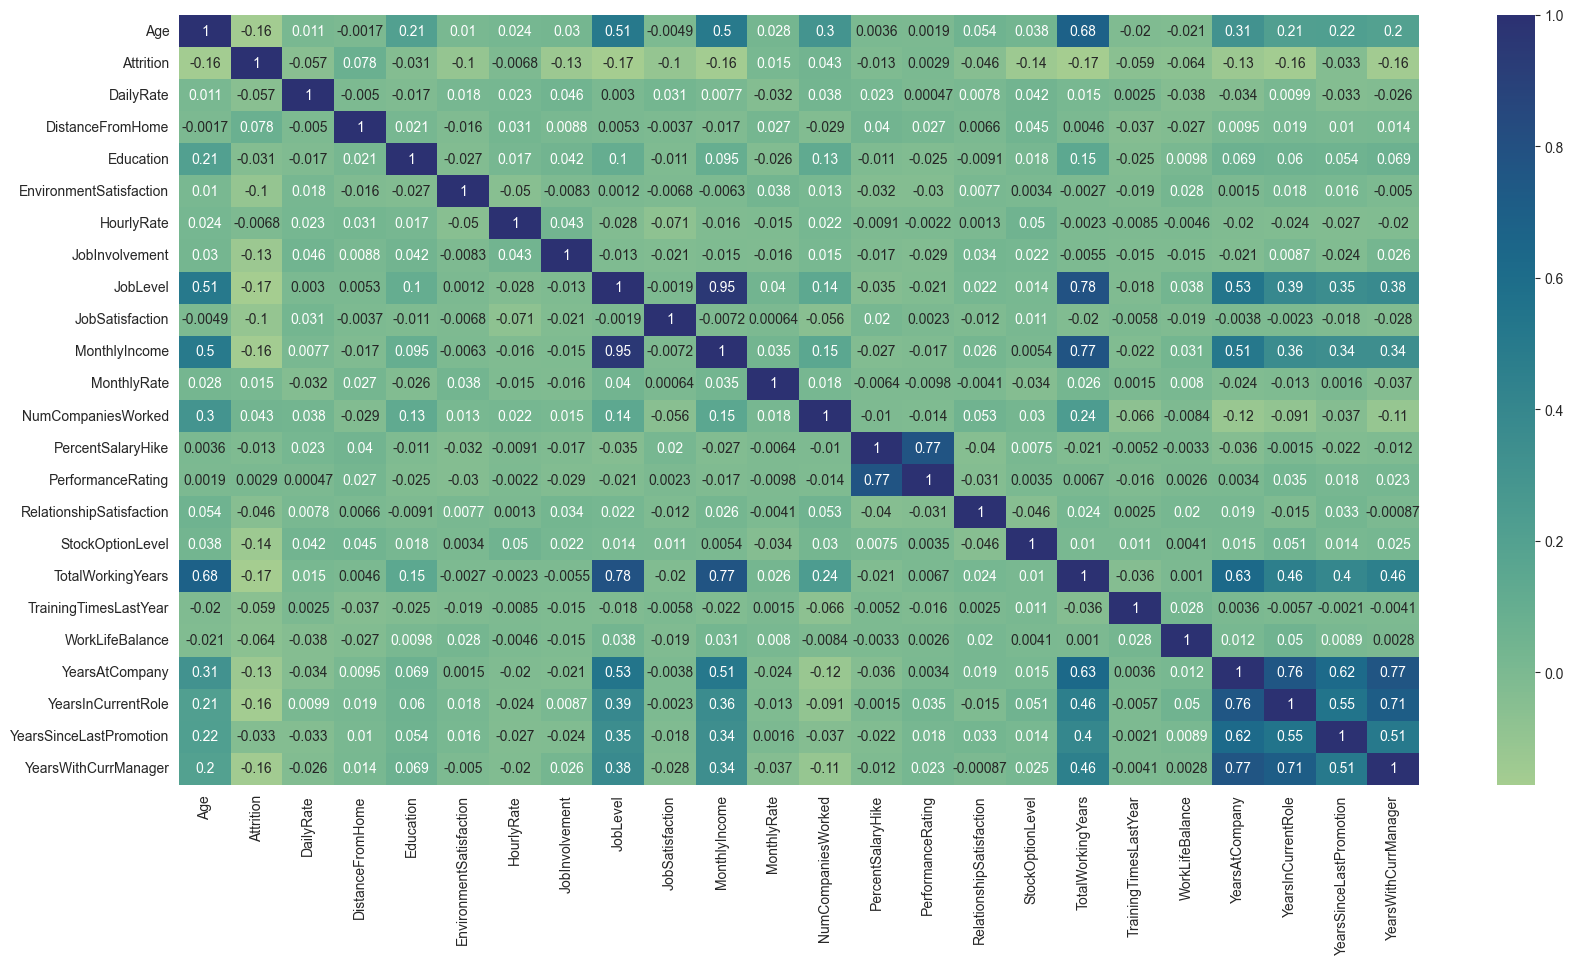

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix, cmap="crest", annot=True,)

Correlation results (sample analysis):

Monthly income is highly correlated with Job level

Job level is highly correlated with total working hours.

Monthly income is highly correlated with total working hours.

Age is also positively correlated with the Total working hours.

Marital status and stock option level are negatively correlated

# My Contribution - Maheshwar Rao Bandi - 16355332

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, accuracy_score


In [ ]:
# Drop target var from categorical col list
categorical_columns = categorical_columns.drop('Attrition')

# find out binary columns
bin_cols = df_trans.nunique()[df_trans.nunique() == 2].keys()
bin_cols = bin_cols.drop('Attrition').to_list()

# drop binary from categorical columns list
categorical_columns = categorical_columns.drop(["Gender", "OverTime"])

In [ ]:
le = LabelEncoder()

for col in bin_cols:
    df_trans[col] = le.fit_transform(df_trans[col])

In [ ]:
df_trans = pd.get_dummies(data=df_trans, columns=categorical_columns, drop_first=True, dtype='uint8')

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score

In [ ]:
X = df_trans.drop('Attrition', axis=1)
y = df_trans.Attrition

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
X_std = scaler.transform(X)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
param_grid_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2,4,6],
}

In [ ]:
grid_search_tree = GridSearchCV(DecisionTreeClassifier(random_state=15),param_grid_tree, cv=10, scoring='roc_auc', verbose=0)
grid_search_tree.fit(X_train, y_train)
best_params_tree = grid_search_tree.best_params_
best_model_tree = grid_search_tree.best_estimator_
results_tree = grid_search_tree.cv_results_


best_params_tree, best_model_tree, grid_search_tree.best_score_

({'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 2},
 DecisionTreeClassifier(max_depth=4, random_state=15),
 0.6979789842571797)

In [ ]:
features = pd.DataFrame({"Feat_importance": grid_search_tree.best_estimator_.feature_importances_}, index=X_train.columns).sort_values(by="Feat_importance", ascending=False)
features = features[features['Feat_importance'] > 0]

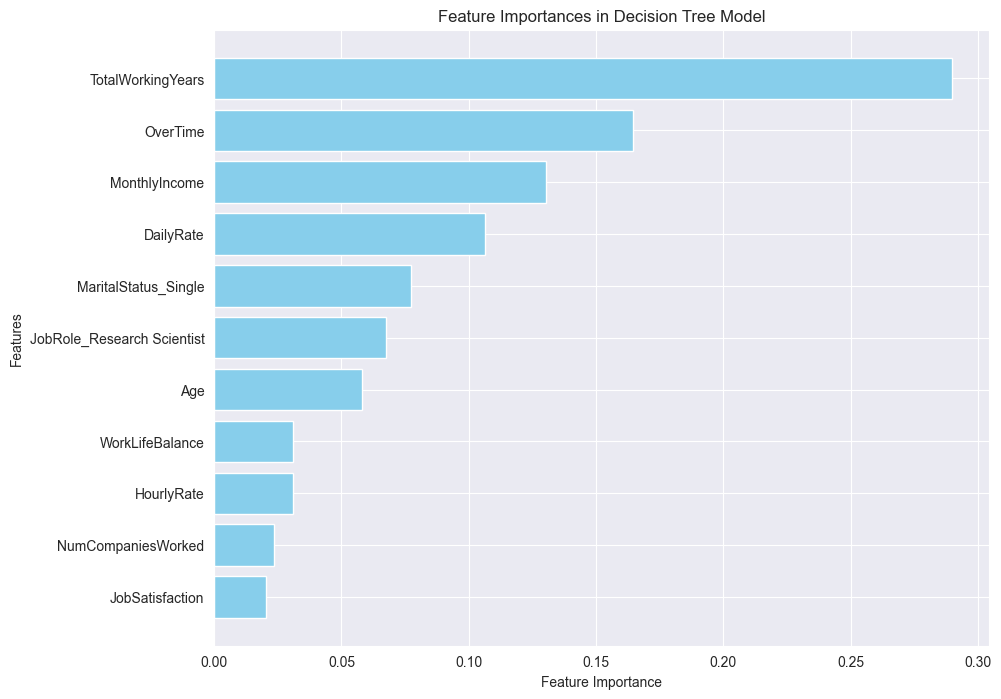

In [ ]:
plt.figure(figsize=(10, 8))
plt.barh(features.index, features['Feat_importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances in Decision Tree Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

This bar graph shows the most important variables in predicting employee attrition using DecisionTreeClassifier Gini importance measure. Based on this graph, TotalWorkingYears, OverTime, and MonthlyIncome are the most important predictors of employee attrition.

In [ ]:
# Initialize counters
count_0 = 0
count_1 = 0
other_count = 0

for i in y:
    if i == 0:
        count_0 += 1
    elif i == 1:
        count_1 += 1
    else:
        other_count += 1

print("Count of 0s:", count_0)
print("Count of 1s:", count_1)
print("Count of other values:", other_count)

Count of 0s: 1233
Count of 1s: 237
Count of other values: 0


In [ ]:
# Get unique values
unique_values = set(y)

# Print unique values
print("Unique values in y:", unique_values)

Unique values in y: {0, 1}


In [ ]:
# Define the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train_std.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the model
history = model.fit(X_train_std, y_train,
                    epochs=50,  # Adjust epochs based on your needs
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)


Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.3519 - loss: 0.9578 - val_accuracy: 0.8305 - val_loss: 0.4726
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8328 - loss: 0.4414 - val_accuracy: 0.8305 - val_loss: 0.4100
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8248 - loss: 0.4053 - val_accuracy: 0.8305 - val_loss: 0.3770
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8394 - loss: 0.3800 - val_accuracy: 0.8475 - val_loss: 0.3552
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8844 - loss: 0.3020 - val_accuracy: 0.8432 - val_loss: 0.3356
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8731 - loss: 0.3151 - val_accuracy: 0.8559 - val_loss: 0.3212
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8959 - loss: 0.2743 - val_accuracy: 0.8729 - val_loss: 0.3132
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9173 - loss: 0.2529 - val_accuracy: 0.8814 - val_loss

In [ ]:
# Evaluate the model on test data
y_pred = model.predict(X_test_std)
y_pred_classes = (y_pred > 0.5).astype("int32")

# Print classification report and accuracy score
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))
print("Accuracy Score:", accuracy_score(y_test, y_pred_classes))


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       247
           1       0.53      0.34      0.42        47

    accuracy                           0.85       294
   macro avg       0.71      0.64      0.66       294
weighted avg       0.83      0.85      0.83       294

Accuracy Score: 0.8469387755102041


Interpretation

Class 0 (likely represents employees who are not at risk of attrition) has a high precision and recall, indicating the model is performing well in identifying this class.

Class 1 (likely represents employees at risk of attrition) has lower precision and recall, suggesting that the model struggles more with predicting this class correctly. The recall for Class 1 is notably low (0.34), indicating that the model misses a significant number of employees at risk of attrition.